# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [213]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

In [4]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [ ]:
#Method 1

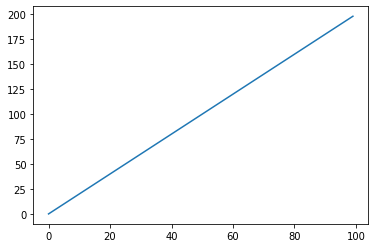

In [5]:
plt.plot(x,y)
plt.show()

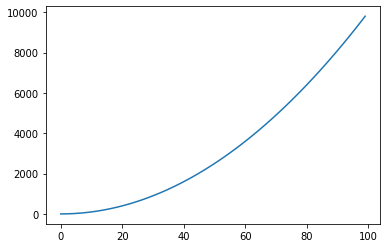

In [6]:
plt.plot(x,z)
plt.show()

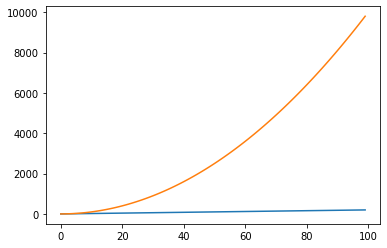

In [7]:
#Method 2
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

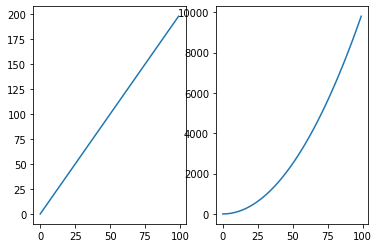

In [8]:
# Method 3
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(x, y)
ax2.plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

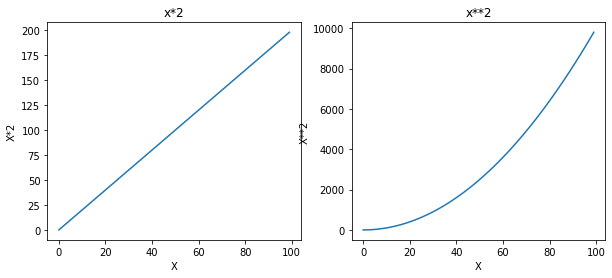

In [23]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4), sharex = True)
ax1.plot(x, y)
ax2.plot(x, z)
ax1.set_title('x*2')
ax2.set_title('x**2')
ax1.set_xlabel('X')
ax1.set_ylabel('X*2')
ax2.set_xlabel('X')
ax2.set_ylabel('X**2')
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

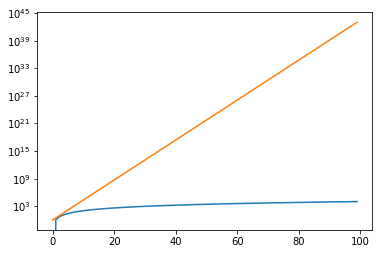

In [20]:
plt.plot(x**2)
plt.plot(math.e**x)
plt.xscale('linear')
plt.yscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

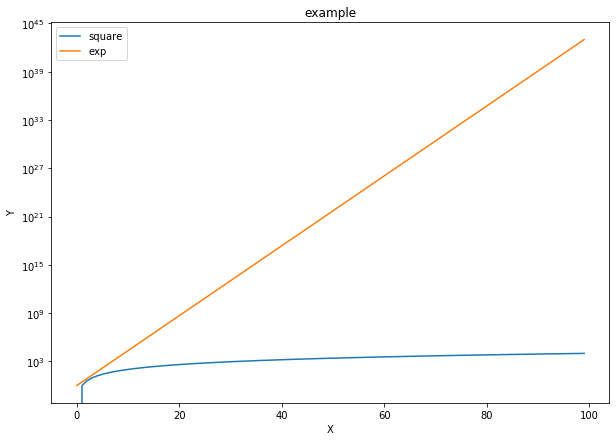

In [29]:
plt.figure(figsize=(10,7)) 
plt.plot(x**2, label = 'square')
plt.plot(math.e**x, label = 'exp')
plt.xscale('linear')
plt.yscale('log')
plt.title('example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [30]:
fitbit = pd.read_csv('/Users/sofiacostadesousa/Desktop/Ironhack/08.29/lab-matplotlib-seaborn/Fitbit2.csv')

In [31]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [32]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [55]:
from statistics import mean
average_steps = fitbit[['Months_encoded', 'Steps', 'Work_or_Weekend']].groupby(['Months_encoded', 'Work_or_Weekend'], as_index = False).agg({'Steps':mean})
average_steps.head()

,Months_encoded,Work_or_Weekend,Steps
0,1,0,9618.400000
1,1,1,10022.380952
2,2,0,10882.250000
3,2,1,8210.363636
4,3,0,4941.250000


In [63]:
average_steps_month = average_steps[['Months_encoded', 'Steps']].groupby(['Months_encoded'], as_index = False).agg({'Steps':mean})

In [70]:
average_steps[average_steps['Work_or_Weekend'] == 0]

,Months_encoded,Work_or_Weekend,Steps
0,1,0,9618.400000
2,2,0,10882.250000
4,3,0,4941.250000
6,4,0,8285.666667
8,5,0,15005.900000
10,6,0,12717.125000
12,7,0,8851.000000
14,8,0,12462.900000
16,9,0,7846.750000
18,10,0,9441.333333


In [74]:
average_steps[average_steps['Work_or_Weekend'] == 0]['Steps']

0      9618.400000
2     10882.250000
4      4941.250000
6      8285.666667
8     15005.900000
10    12717.125000
12     8851.000000
14    12462.900000
16     7846.750000
18     9441.333333
20     9624.000000
22     9725.875000
Name: Steps, dtype: float64

In [77]:
average_steps

,Months_encoded,Work_or_Weekend,Steps
0,1,0,9618.400000
1,1,1,10022.380952
2,2,0,10882.250000
3,2,1,8210.363636
4,3,0,4941.250000
5,3,1,12181.347826
6,4,0,8285.666667
7,4,1,15133.333333
8,5,0,15005.900000
9,5,1,8531.619048


No handles with labels found to put in legend.


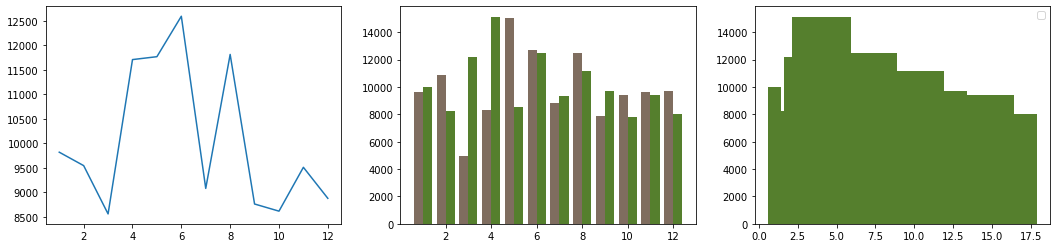

In [178]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

ax1.plot(average_steps_month['Months_encoded'], average_steps_month['Steps'])

width = 0.4
rect1 = ax2.bar(average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 0] -width/2, average_steps.Steps[average_steps['Work_or_Weekend'] == 0], width = width, color='#7f6d5f', label = 'weekend')
rect2 = ax2.bar(average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 0] +width/2, average_steps.Steps[average_steps['Work_or_Weekend'] == 1], width = width, color='#557f2d', label = 'week')

plt.legend(loc='best')  

#ax2.bar(average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 0], average_steps.Steps[average_steps['Work_or_Weekend'] == 0], label = 'week')
ax3.bar(average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 1], average_steps.Steps[average_steps['Work_or_Weekend'] == 1], color='#557f2d', label = 'weekend')

#ax2.bar(x = [1,2,3,4,5,6,7,8,9,10,11,12], height = average_steps[average_steps['Work_or_Weekend'] == 1]['Steps'], color='#7f6d5f', width = width, label = 'work')
#ax2.bar(x = [1,2,3,4,5,6,7,8,9,10,11,12], height = average_steps[average_steps['Work_or_Weekend'] == 0]['Steps'], color='#557f2d', width = width, label = 'weekend')

plt.show()

<BarContainer object of 12 artists>

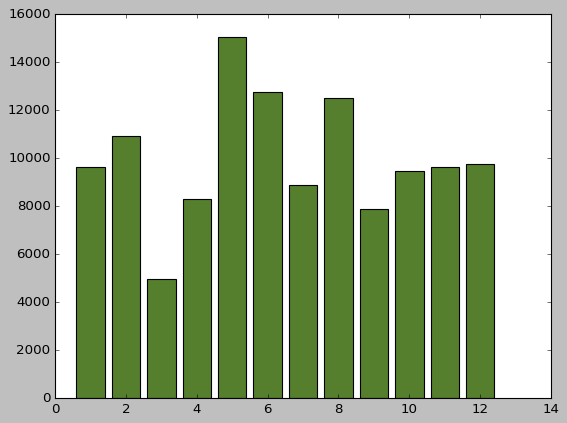

In [239]:
plt.bar(average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 0], average_steps.Steps[average_steps['Work_or_Weekend'] == 0], color='#557f2d', label = 'weekend')

<BarContainer object of 12 artists>

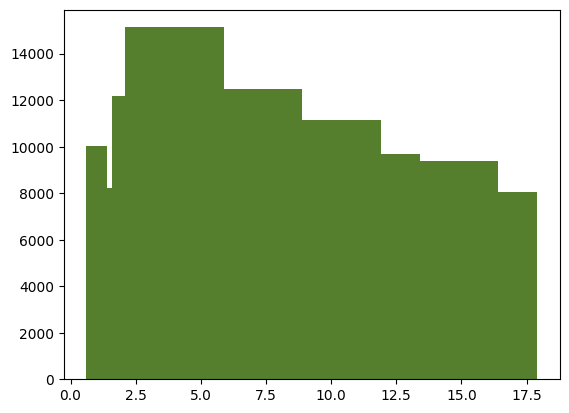

In [253]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.bar(average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 1], average_steps.Steps[average_steps['Work_or_Weekend'] == 1], color='#557f2d', label = 'weekend')

In [ ]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


In [192]:
columns = average_steps.Steps[average_steps['Work_or_Weekend'] == 1]
rows2 = average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 0]
rows = average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 1] 

list(map(lambda x,y: x == y, rows, rows2))

[True, True, True, True, True, True, True, True, True, True, True, True]

In [183]:
average_steps.Months_encoded[average_steps['Work_or_Weekend'] == 1], average_steps.Steps[average_steps['Work_or_Weekend'] == 1]

(1      1
 3      2
 5      3
 7      4
 9      5
 11     6
 13     7
 15     8
 17     9
 19    10
 21    11
 23    12
 Name: Months_encoded, dtype: int64, 1     10022.380952
 3      8210.363636
 5     12181.347826
 7     15133.333333
 9      8531.619048
 11    12470.363636
 13     9312.391304
 15    11166.619048
 17     9680.272727
 19     7794.272727
 21     9400.380952
 23     8033.260870
 Name: Steps, dtype: float64)

In [ ]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [215]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

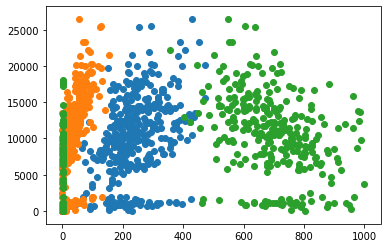

In [217]:
x = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for i in x:
    plt.scatter(fitbit[i], fitbit['Steps'])
plt.show()

In [ ]:
# your code here

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [219]:
titanic = pd.read_csv('/Users/sofiacostadesousa/Desktop/Ironhack/08.29/lab-matplotlib-seaborn/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [222]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [224]:
# NUMERICAL VARIABLES
titanic.select_dtypes(np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
5,6,0.0,3,23.926502,0,0,8.4583
6,7,0.0,1,54.000000,0,0,51.8625
7,8,0.0,3,2.000000,3,1,21.0750
8,9,1.0,3,27.000000,0,2,11.1333
9,10,1.0,2,14.000000,1,0,30.0708


In [225]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
5,"Moran, Mr. James",male,330877,U0,Q
6,"McCarthy, Mr. Timothy J",male,17463,E46,S
7,"Palsson, Master. Gosta Leonard",male,349909,U0,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,U0,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,U0,C


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [226]:
plt.figure(figsize=(12,6)) 
plt.style.use('classic')

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

In [231]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

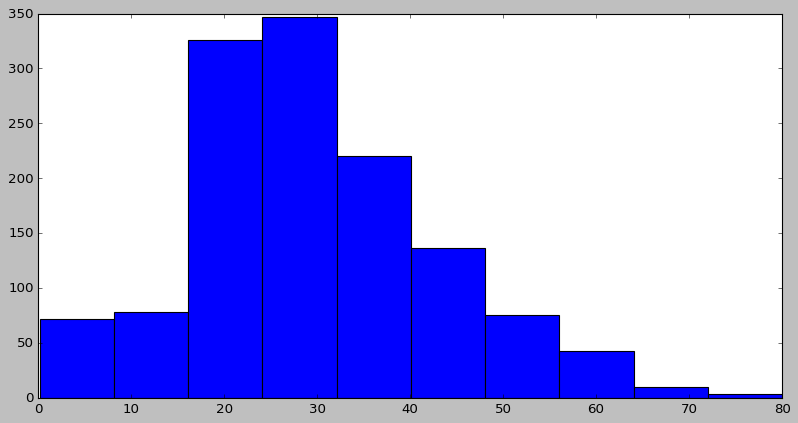

In [235]:
plt.figure(figsize=(12,6)) 
plt.style.use('classic')
plt.hist(titanic.Age)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

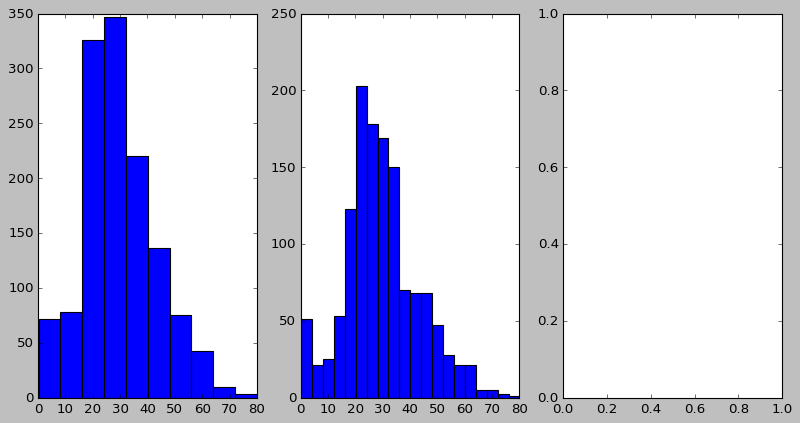

In [256]:
fig, (ax1, ax2, a3) = plt.subplots(1,3, figsize=(12,6)) 
plt.style.use('classic')
ax1.hist(titanic.Age, bins = 10)
ax2.hist(titanic.Age, bins = 20)
ax3.hist(titanic.Age, bins = 30)
plt.show()

#### Use seaborn to show the distribution of column `Age`.

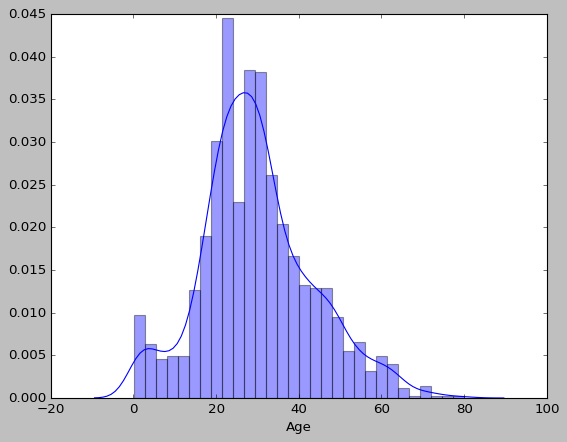

In [260]:
sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

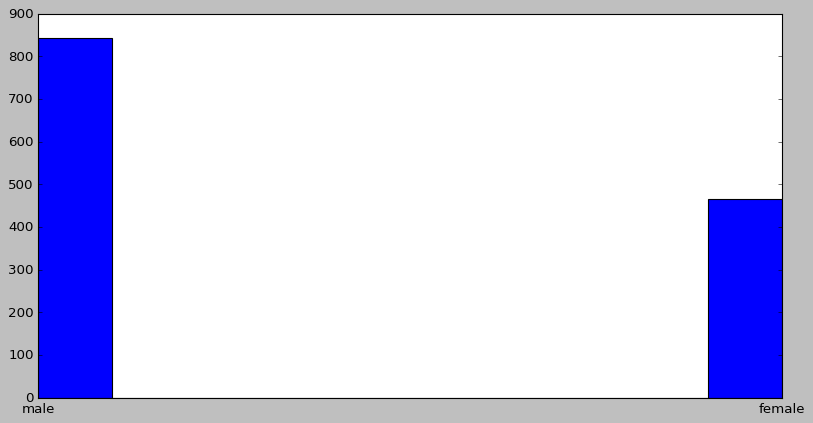

In [262]:
# Method 1 - matplotlib
plt.figure(figsize=(12,6)) 
plt.hist(titanic.Gender)
plt.show()

In [267]:
titanic['Gender'].unique()

array(['male', 'female'], dtype=object)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

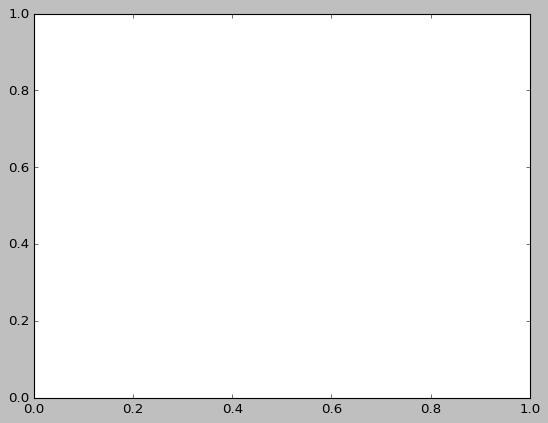

In [272]:
# Method 2 - seaborn
#sns.distplot(titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

(array([323.,   0.,   0.,   0.,   0., 277.,   0.,   0.,   0., 709.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

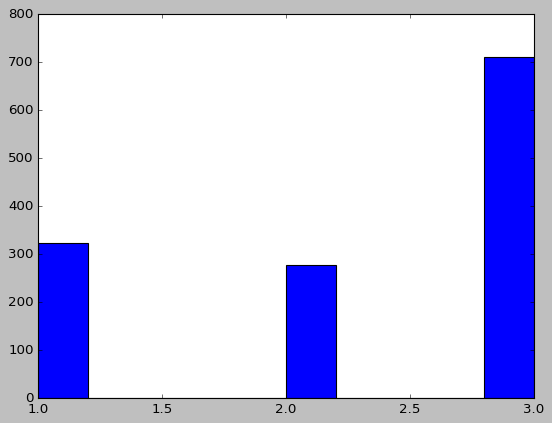

In [276]:
plt.hist(titanic['Pclass'])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

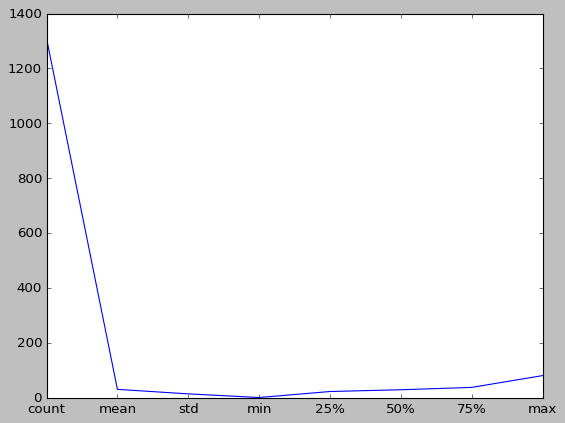

In [279]:
plt.plot(titanic['Age'].describe())

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


In [ ]:
# Method 1 - matplotlib
# your code here

In [292]:
# Method 2 - seaborn

#### Plot the correlation matrix using seaborn.

In [287]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


In [290]:
titanic_corr_mask = titanic.corr() > 0.5

In [291]:
titanic.corr()[titanic_corr_mask]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Fare,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here